Automatically created module for IPython interactive environment
Distorting image...
Extracting reference patches...


C:\Users\jeffnerd\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


done in 0.19s.
Learning the dictionary...
done in 10.73s.
Extracting noisy patches... 
done in 0.05s.
Orthogonal Matching Pursuit
1 atom...
done in 14.37s.
Orthogonal Matching Pursuit
2 atoms...
done in 29.08s.
Least-angle regression
5 atoms...
done in 172.94s.
Thresholding
 alpha=0.1...
done in 1.73s.


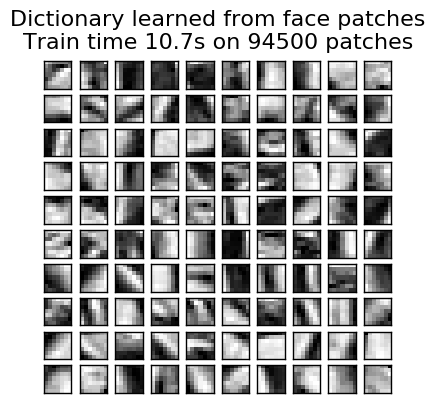

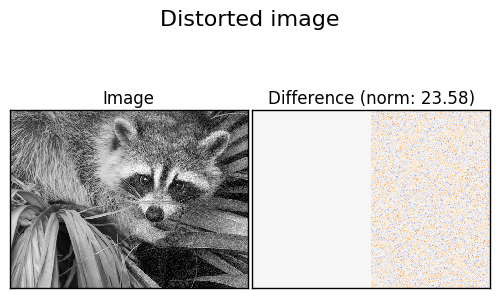

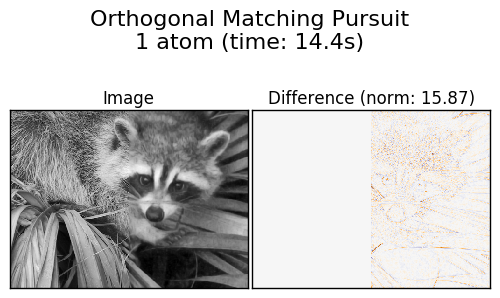

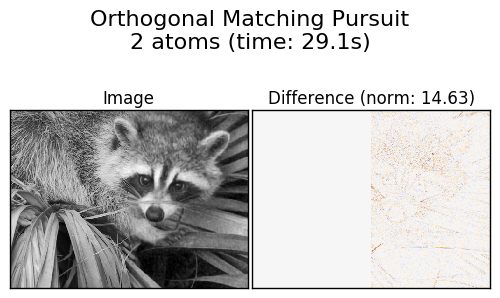

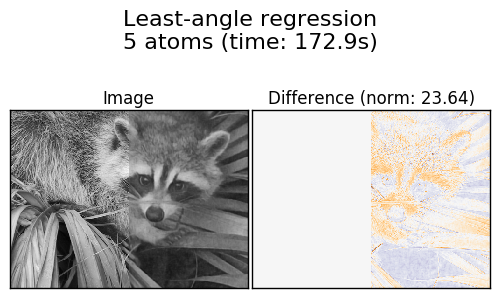

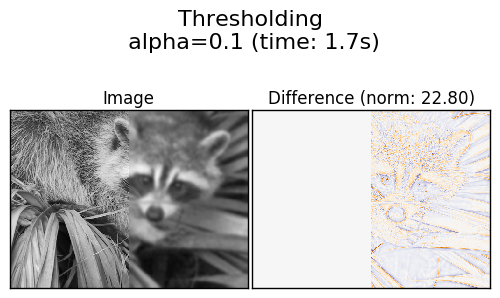

In [2]:
print(__doc__)
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

try: # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)
# Convert from uint8 representation with values between 0 and 255 to
# a floating point representation with values between 0 and 1.
face = face / 255.
# downsample for higher speed
face = face[::2, ::2] + face[1::2, ::2] + face[::2, 1::2] + face[1::2, 1::2]
face /= 4.0
height, width = face.shape
# Distort the right half of the image
print('Distorting image...')
distorted = face.copy()
distorted[:, width // 2:] += 0.075 * np.random.randn(height, width // 2)
# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
t0 = time()
patch_size = (7, 7)
data = extract_patches_2d(distorted[:, :width // 2], patch_size)
data = data.reshape(data.shape[0], -1)
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)
print('done in %.2fs.' % (time() - t0))
# #############################################################################
# Learn the dictionary from reference patches
print('Learning the dictionary...')
t0 = time()
dico = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=500)
V = dico.fit(data).components_
dt = time() - t0
print('done in %.2fs.' % dt)
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:100]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary learned from face patches\n' +
'Train time %.1fs on %d patches' % (dt, len(data)),
fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
# #############################################################################
# Display the distorted image
def show_with_diff(image, reference, title):
    """Helper function to display denoising"""
    plt.figure(figsize=(5, 3.3))
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(image, vmin=0, vmax=1, cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.subplot(1, 2, 2)
    difference = image - reference
    plt.title('Difference (norm: %.2f)' % np.sqrt(np.sum(difference ** 2)))
    plt.imshow(difference, vmin=-0.5, vmax=0.5, cmap=plt.cm.PuOr,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.suptitle(title, size=16)
    plt.subplots_adjust(0.02, 0.02, 0.98, 0.79, 0.02, 0.2)
show_with_diff(distorted, face, 'Distorted image')
# #############################################################################
# Extract noisy patches and reconstruct them using the dictionary
print('Extracting noisy patches... ')
t0 = time()
data = extract_patches_2d(distorted[:, width // 2:], patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept
print('done in %.2fs.' % (time() - t0))
transform_algorithms = [
('Orthogonal Matching Pursuit\n1 atom', 'omp',
{'transform_n_nonzero_coefs': 1}),
('Orthogonal Matching Pursuit\n2 atoms', 'omp',
{'transform_n_nonzero_coefs': 2}),
('Least-angle regression\n5 atoms', 'lars',
{'transform_n_nonzero_coefs': 5}),
('Thresholding\n alpha=0.1', 'threshold', {'transform_alpha': .1})]
reconstructions = {}
for title, transform_algorithm, kwargs in transform_algorithms:
    print(title + '...')
    reconstructions[title] = face.copy()
    t0 = time()
    dico.set_params(transform_algorithm=transform_algorithm, **kwargs)
    code = dico.transform(data)
    patches = np.dot(code, V)
    patches += intercept
    patches = patches.reshape(len(data), *patch_size)
    if transform_algorithm == 'threshold':
        patches -= patches.min()
        patches /= patches.max()
    reconstructions[title][:, width // 2:] = reconstruct_from_patches_2d(
                    patches, (height, width // 2))
    dt = time() - t0
    print('done in %.2fs.' % dt)
    show_with_diff(reconstructions[title], face,
                   title + ' (time: %.1fs)' % dt)
plt.show()

Automatically created module for IPython interactive environment
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\jeffnerd\scikit_learn_data
Dataset consists of 400 faces
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 1.631s
Extracting the top 6 Non-negative components - NMF...
done in 1.525s
Extracting the top 6 Independent components - FastICA...


C:\Users\jeffnerd\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


done in 1.110s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 2.065s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 1.450s
Extracting the top 6 Cluster centers - MiniBatchKMeans...
done in 0.485s
Extracting the top 6 Factor Analysis components - FA...


C:\Users\jeffnerd\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


done in 0.330s


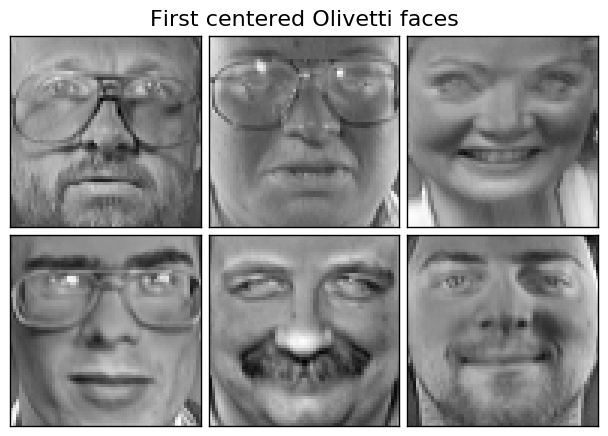

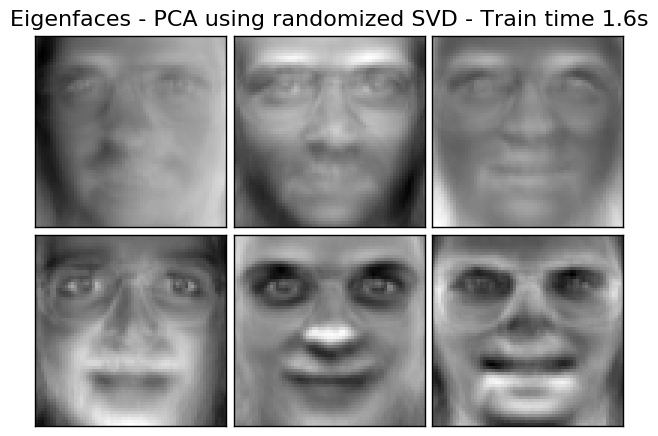

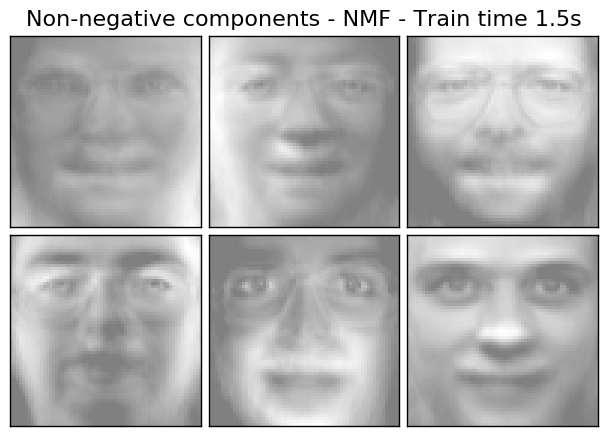

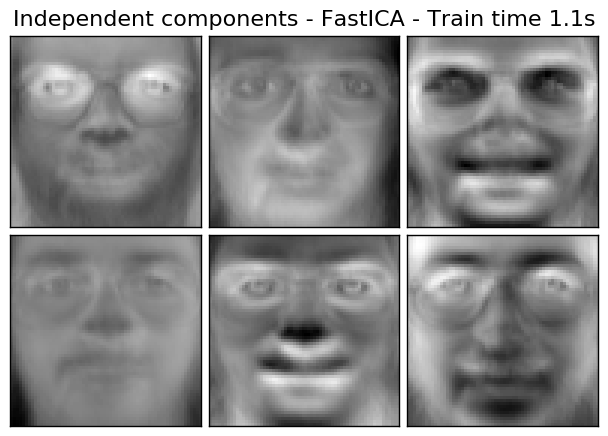

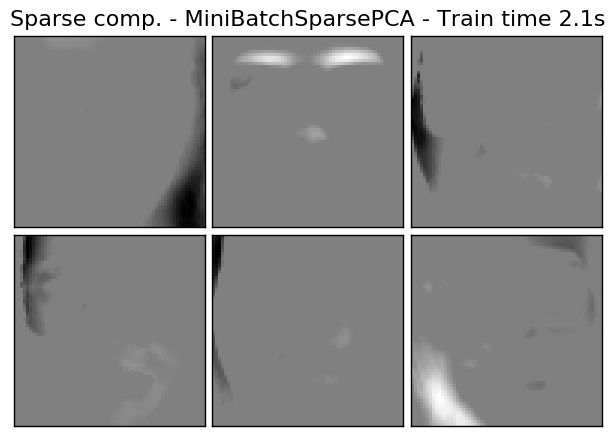

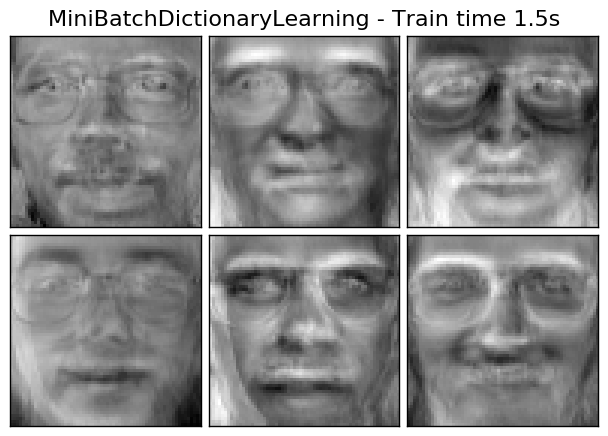

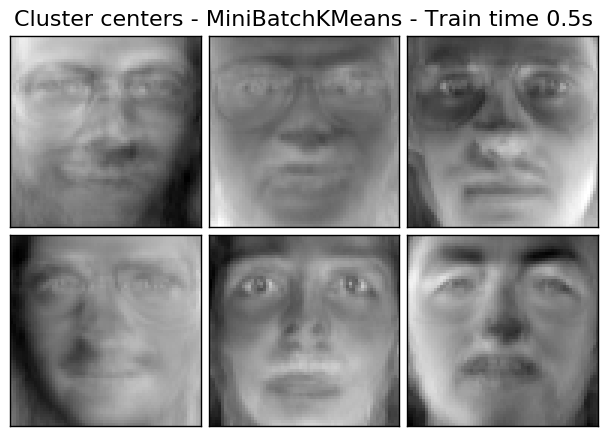

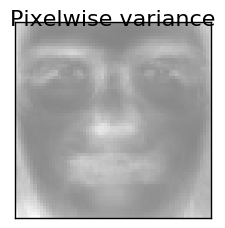

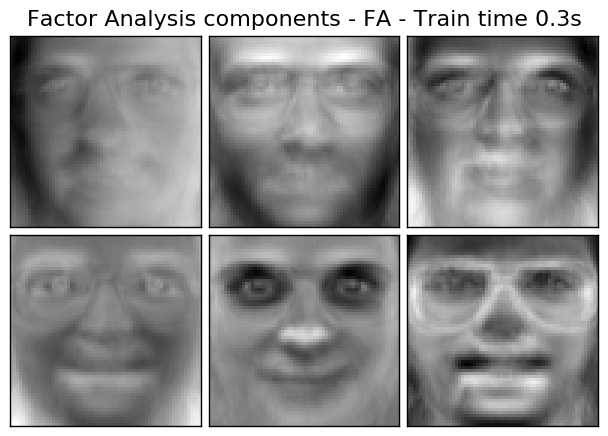

In [1]:
print(__doc__)
# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause
import logging
from time import time
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
# #############################################################################
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
n_samples, n_features = faces.shape
# global centering
faces_centered = faces - faces.mean(axis=0)
# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)
print("Dataset consists of %d faces" % n_samples)
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
('Eigenfaces - PCA using randomized SVD',
decomposition.PCA(n_components=n_components, svd_solver='randomized',
whiten=True),
True),
('Non-negative components - NMF',
decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
False),
('Independent components - FastICA',
decomposition.FastICA(n_components=n_components, whiten=True),
True),
('Sparse comp. - MiniBatchSparsePCA',
decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
n_iter=100, batch_size=3,
random_state=rng),
True),
('MiniBatchDictionaryLearning',
decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
n_iter=50, batch_size=3,
random_state=rng),
 True),
('Cluster centers - MiniBatchKMeans',
MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
max_iter=50, random_state=rng),
True),
('Factor Analysis components - FA',
decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
True),
]
# #############################################################################
# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])
# #############################################################################
# Do the estimation and plot it
for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
        estimator.noise_variance_.ndim > 0): # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()